In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
# local imports
import Plotting as myplt

In [2]:
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab1 - Two Slit Interference\\Data\\'

# Data

In [3]:
# store files names for all datasets
filenames: dict[str,str] = {
   'Laser 1s'   : path_data + '2-Slit Interference Lab - Laser Single Slit-8_24_23.csv',
   'Laser 2s'   : path_data + '2-Slit Interference Lab - Laser Interference Pattern (fine)-8_24_23.csv',
   'Bulb 2s t1' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern-8_31_23.csv',
   'Bulb 2s t2' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 2.csv',
   'Bulb 2s t3' : path_data + '2-Slit Interference Lab - Bulb Interference Pattern 3.csv',
   'Bulb 1s'    : path_data + '2-Slit Interference Lab - Bulb Single Slit-9_19_23.csv'
} # s==slit, t==trial

In [4]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

Laser 1s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Laser 2s columns:	 ['Micrometer Position (mm)', 'Voltage (V)']
Bulb 2s t1 columns:	 ['Micrometer Position (mm)', 'Counts/10s', 'Photon/S (Hz)']
Bulb 2s t2 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 2s t3 columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']
Bulb 1s columns:	 ['Micrometer Position (mm)', 'counts/10s', 'Photon/S (Hz)']


# Basic Plots

In [5]:
colors: dict[str,str] = {
    'Laser' : 'maroon',
    'Bulb'  : 'green'
}
# https://www.rapidtables.com/web/color/RGB_Color.html#color-table

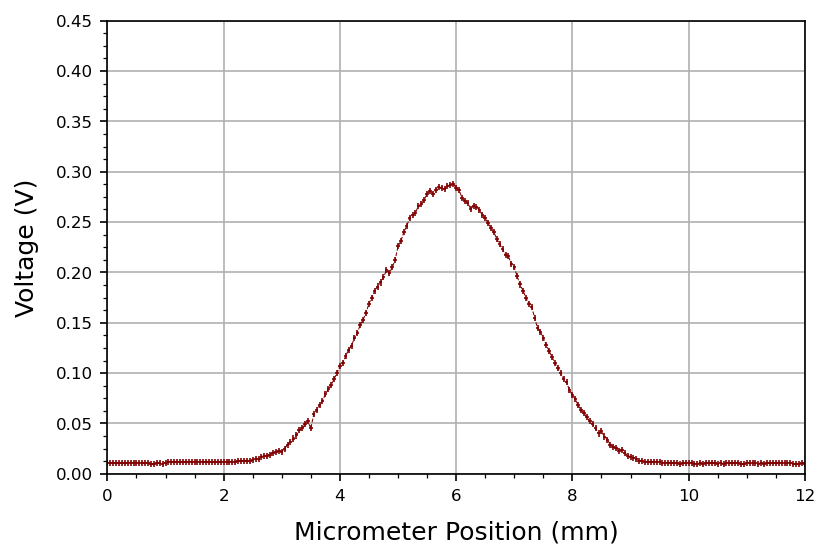

0.288


In [6]:
myplt.PlotXY(
    x = tables['Laser 1s']['Micrometer Position (mm)'],
    y = tables['Laser 1s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    xerr = 0.03,
    yerr = 0.003,
    color = colors['Laser'],
    xlim = [0,12],
    ylim = [0,0.45],
    fileName = path_fig + 'Laser1s.png'
)
print(max(tables['Laser 1s']['Voltage (V)']))

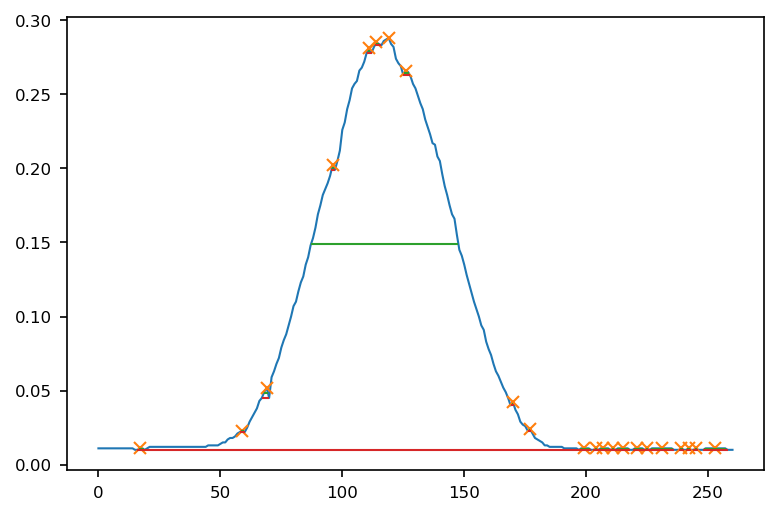

half-width points:  [60.4] [points]
half-width length:  [3.02] [units]


In [47]:
def Peaks(x,y, minWidth=10, plot=True) : 
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html
    import numpy as np
    from scipy.signal import chirp, find_peaks, peak_widths
    import matplotlib.pyplot as plt

    peaks, _ = find_peaks(y)
    results_half = peak_widths(y, peaks, rel_height=0.5)
    results_half[0]  # widths
    results_full = peak_widths(y, peaks, rel_height=1)
    results_full[0]  # widths

    if(plot) : 
        plt.plot(y)
        plt.plot(peaks, y[peaks], "x")
        plt.hlines(*results_half[1:], color="C2")
        plt.hlines(*results_full[1:], color="C3")
        plt.show()

    step = np.mean(np.diff(x))
    width = results_half[0][ results_half[0] > minWidth ]

    print('half-width points: ', width, '[points]')
    print('half-width length: ', width*step, '[units]')

Peaks( 
    tables['Laser 1s']['Micrometer Position (mm)'],
    tables['Laser 1s']['Voltage (V)'],
    plot=True)

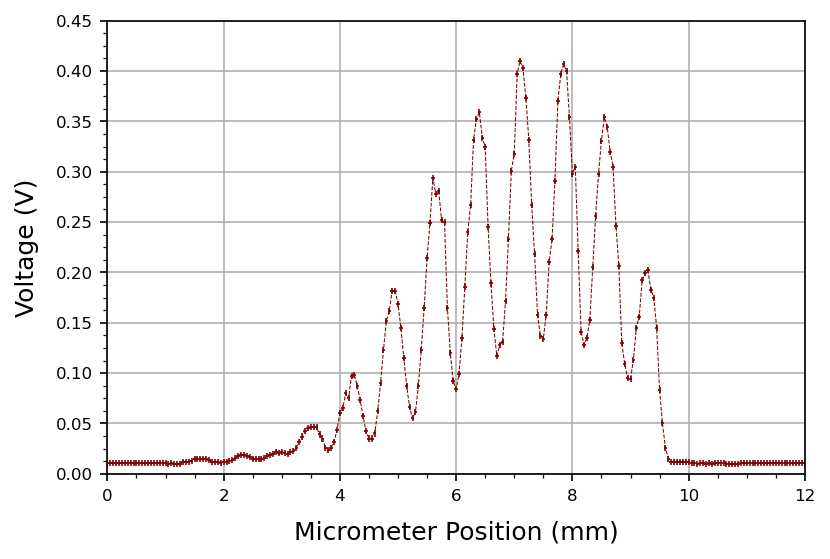

0.41


In [7]:
myplt.PlotXY(
    x = tables['Laser 2s']['Micrometer Position (mm)'],
    y = tables['Laser 2s']['Voltage (V)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    xerr = 0.03,
    yerr = 0.003,
    color = colors['Laser'],
    xlim = [0,12],
    ylim = [0,0.45],
    fileName = path_fig + 'Laser2s.png'
)
print(max(tables['Laser 2s']['Voltage (V)']))

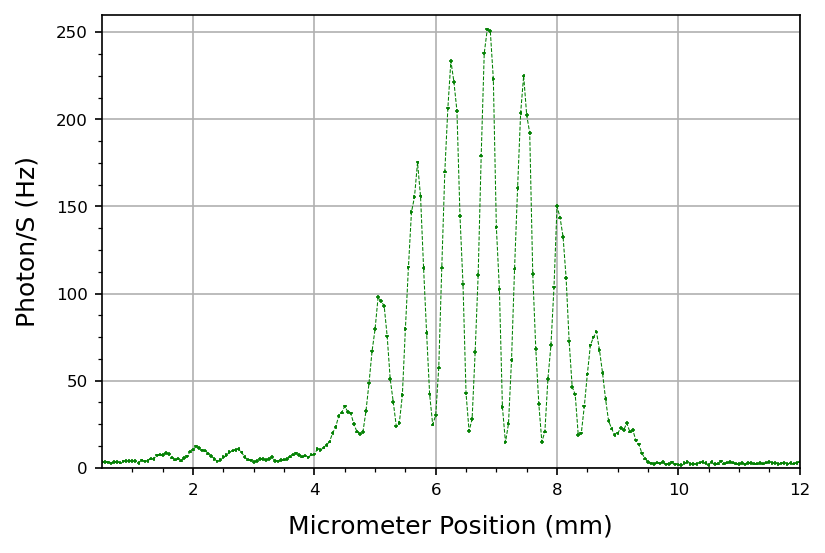

251.6


In [8]:
myplt.PlotXY(
    x = tables['Bulb 2s t1']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t1']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = 0.03,
    yerr = 1,
    color = colors['Bulb'],
    xlim = [0.5,12],
    ylim = [0,260],
    fileName = path_fig + 'Bulb2st1.png'
)
print(max(tables['Bulb 2s t1']['Photon/S (Hz)']))

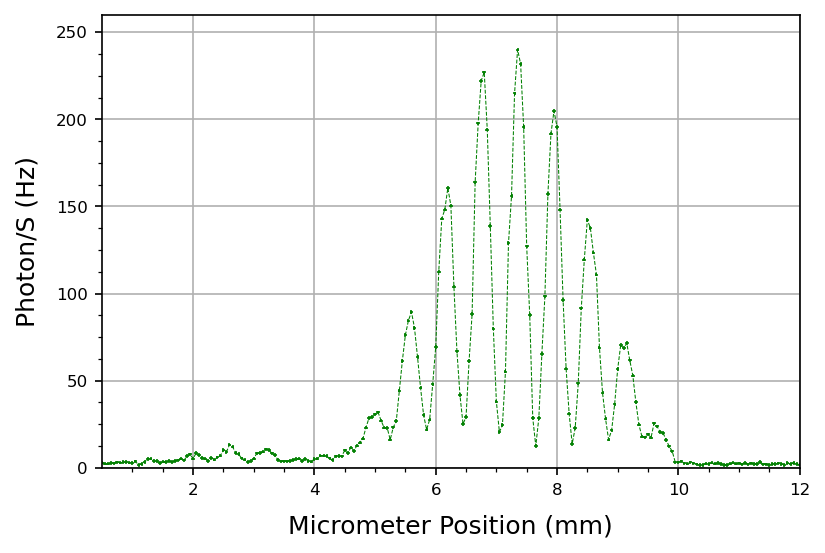

240.0


In [9]:
myplt.PlotXY(
    x = tables['Bulb 2s t2']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t2']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = 0.03,
    yerr = 1,
    color = colors['Bulb'],
    xlim = [0.5,12],
    ylim = [0,260],
    fileName = path_fig + 'Bulb2st2.png'
)
print(max(tables['Bulb 2s t2']['Photon/S (Hz)']))

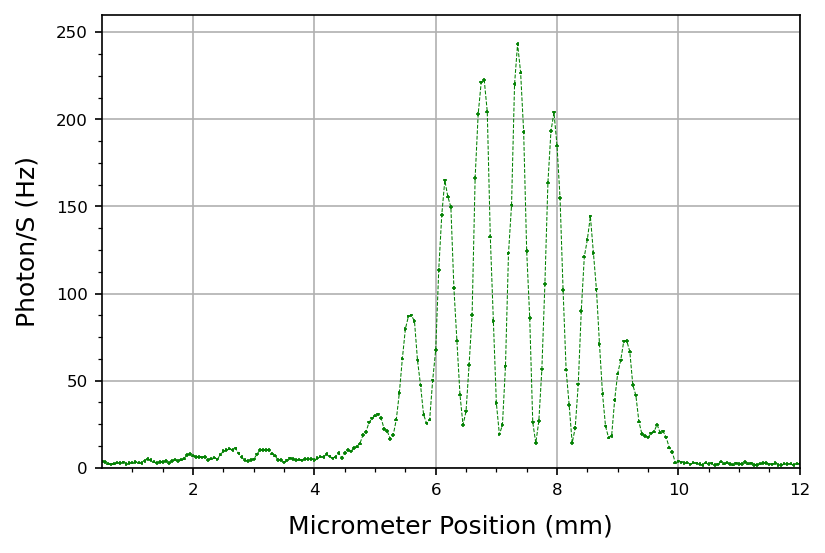

243.3


In [10]:
myplt.PlotXY(
    x = tables['Bulb 2s t3']['Micrometer Position (mm)'],
    y = tables['Bulb 2s t3']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = 0.03,
    yerr = 1,
    color = colors['Bulb'],
    xlim = [0.5,12],
    ylim = [0,260],
    fileName = path_fig + 'Bulb2st3.png'
)
print(max(tables['Bulb 2s t3']['Photon/S (Hz)']))

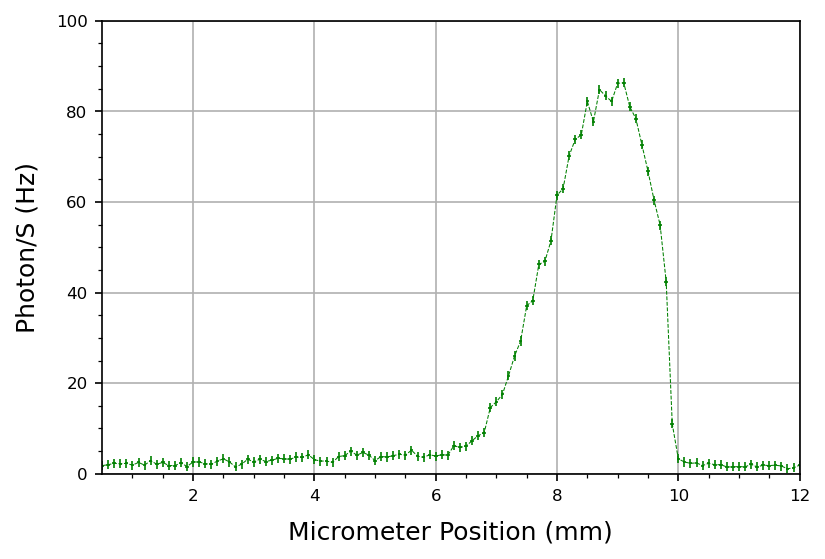

86.3


In [11]:
myplt.PlotXY(
    x = tables['Bulb 1s']['Micrometer Position (mm)'],
    y = tables['Bulb 1s']['Photon/S (Hz)'],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = 0.03,
    yerr = 1,
    color = colors['Bulb'],
    xlim = [0.5,12],
    ylim = [0,100],
    fileName = path_fig + 'Bulb1s.png'
)
print(max(tables['Bulb 1s']['Photon/S (Hz)']))

# MultiLinePlots

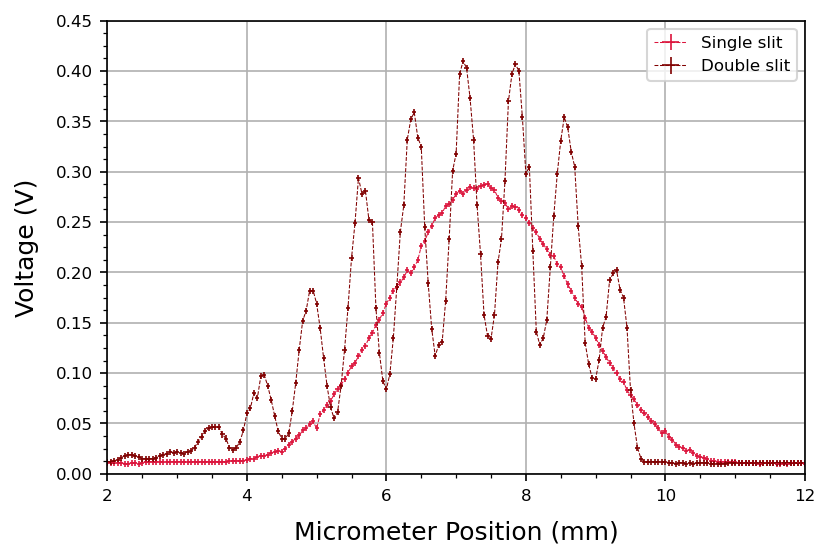

In [12]:
myplt.PlotMultiXY(
    x = [
            tables['Laser 1s']['Micrometer Position (mm)'] + 1.5,
            tables['Laser 2s']['Micrometer Position (mm)']
        ],
    y = [
            tables['Laser 1s']['Voltage (V)'],
            tables['Laser 2s']['Voltage (V)']
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Voltage (V)',
    yerr = [0.003,0.003],
    xerr = [0.03,0.03],
    color = ['crimson', 'maroon' ],
    linestyle = [ '--', '--' ],
    legend = [ 'Single slit', 'Double slit' ],
    xlim = [2,12],
    ylim = [0,0.45],
    fileName = path_fig + 'Laser1s2s.png'
)

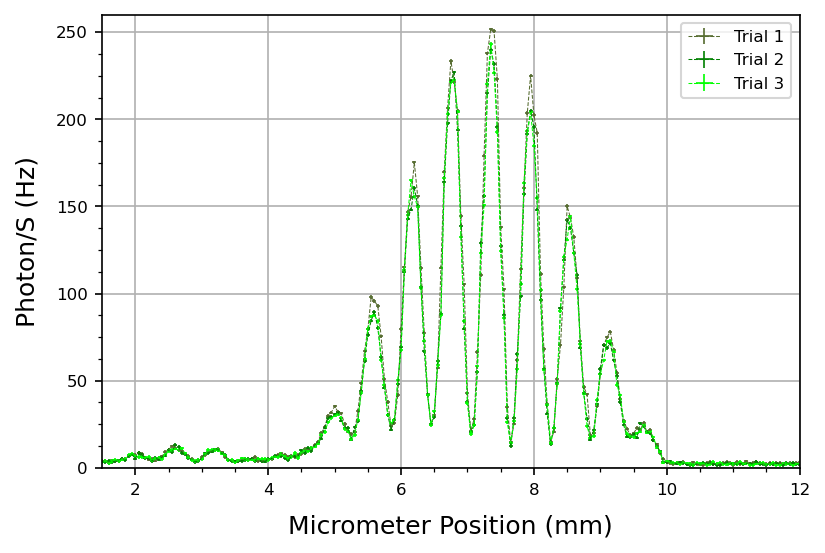

In [13]:
myplt.PlotMultiXY(
    x = [
            tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
            tables['Bulb 2s t2']['Micrometer Position (mm)'],
            tables['Bulb 2s t3']['Micrometer Position (mm)']
        ],
    y = [
            tables['Bulb 2s t1']['Photon/S (Hz)'],
            tables['Bulb 2s t2']['Photon/S (Hz)'],
            tables['Bulb 2s t3']['Photon/S (Hz)']
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = [0.03,0.03,0.03],
    yerr = [1,1,1],
    color = [
                'darkolivegreen',
                'green',
                'lime'
            ],
    linestyle = [
        '--', '--', '--'
    ],
    legend = [
        'Trial 1', 'Trial 2', 'Trial 3'
    ],
    xlim = [1.5,12],
    ylim = [0,260],
    fileName = path_fig + 'Bulb2st123.png'
)

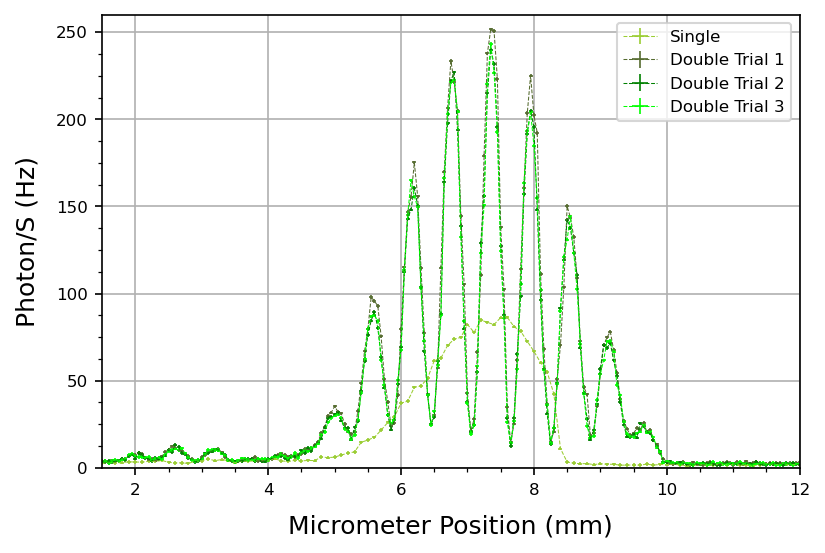

In [14]:
myplt.PlotMultiXY(
    x = [
            tables['Bulb 1s']['Micrometer Position (mm)'] - 1.5,
            tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
            tables['Bulb 2s t2']['Micrometer Position (mm)'],
            tables['Bulb 2s t3']['Micrometer Position (mm)'],
        ],
    y = [
            tables['Bulb 1s']['Photon/S (Hz)'],
            tables['Bulb 2s t1']['Photon/S (Hz)'],
            tables['Bulb 2s t2']['Photon/S (Hz)'],
            tables['Bulb 2s t3']['Photon/S (Hz)'],
        ],
    xlab = 'Micrometer Position (mm)',
    ylab = 'Photon/S (Hz)',
    xerr = [0.03,0.03,0.03,0.03],
    yerr = [1,1,1,1],
    color = [   'yellowgreen',
                'darkolivegreen',
                'green',
                'lime',
            ],
    linestyle = [
        '--', '--', '--', '--'
    ],
    legend = [
        'Single', 'Double Trial 1', 'Double Trial 2', 'Double Trial 3', 
    ],
    xlim = [1.5,12],
    ylim = [0,260],
    fileName = path_fig + 'Bulb1s2s.png'
)

# Dual Axis Plots

In [15]:
lam_green = (551. + 541.)/2
lam_red = 670.
lamRatio_redgreen =  lam_red / lam_green
print(lamRatio_redgreen)

1.2271062271062272


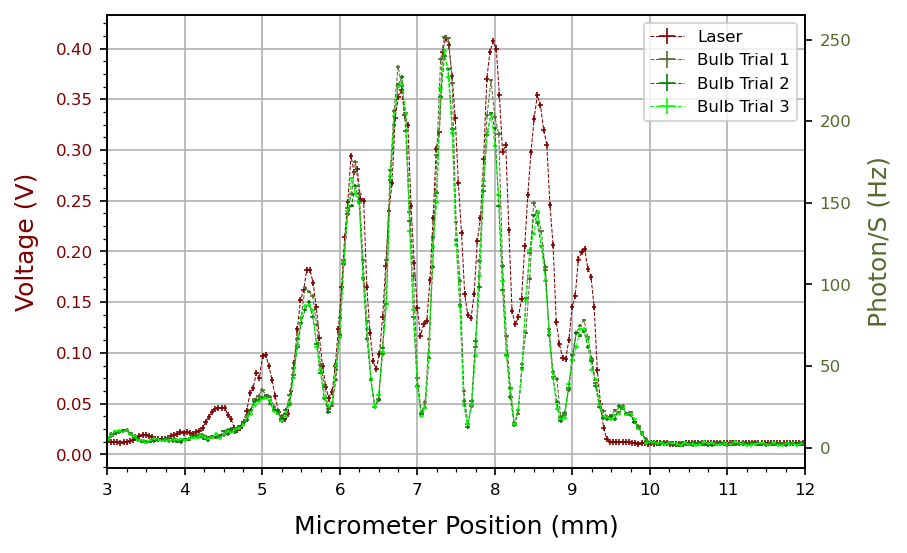

In [16]:
myplt.PlotMultiXY_DualY(
    # y axis 1
    x_ax1       = [tables['Laser 2s']['Micrometer Position (mm)']/(lamRatio_redgreen) + 1.58,],
    y_ax1       = [tables['Laser 2s']['Voltage (V)']],
    yerr_ax1    = [0.003],
    xerr_ax1    = [0.03],
    ylab_ax1    = 'Voltage (V)',        
    color_ax1   = ['maroon'],      
    linestyle_ax1 = ['--'],  
    legend_ax1  = ['Laser'],     
    # y axis 2
    x_ax2       = [ tables['Bulb 2s t1']['Micrometer Position (mm)']+0.5, # shift right to align with other lines
                    tables['Bulb 2s t2']['Micrometer Position (mm)'],
                    tables['Bulb 2s t3']['Micrometer Position (mm)'],],
    y_ax2       = [ tables['Bulb 2s t1']['Photon/S (Hz)'],
                    tables['Bulb 2s t2']['Photon/S (Hz)'],
                    tables['Bulb 2s t3']['Photon/S (Hz)'],],
    xerr_ax2    = [0.03,0.03,0.03],
    yerr_ax2    = [1,1,1],
    ylab_ax2    ='Photon/S (Hz)',        
    color_ax2   = ['darkolivegreen','green','lime'],      
    linestyle_ax2 = ['--','--','--'],  
    legend_ax2  = ['Bulb Trial 1', 'Bulb Trial 2', 'Bulb Trial 3'],     
    # shared properties 
    xlab        = 'Micrometer Position (mm)',            
    xlim        = [3,12], 
    fileName    = path_fig + 'Lasers2_Bulb2st123.png'
)

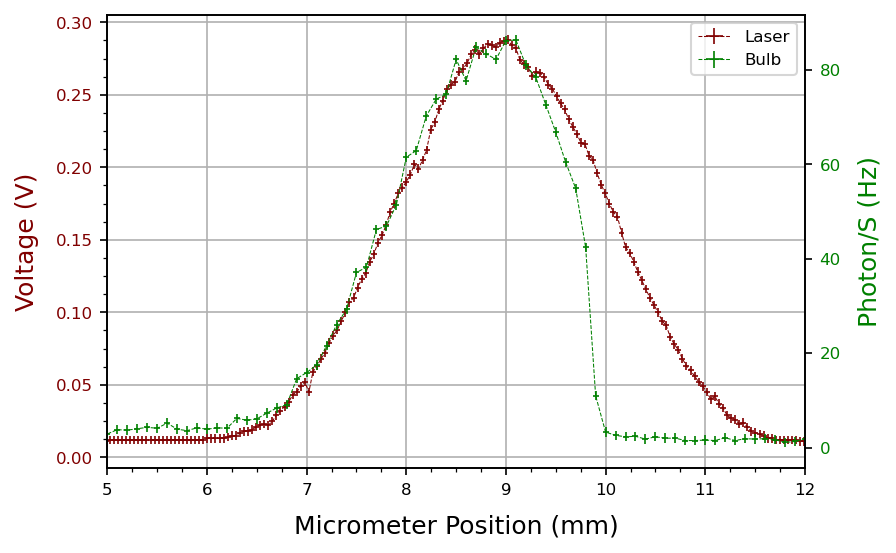

In [17]:
myplt.PlotMultiXY_DualY(
    # y axis 1
    x_ax1       = [tables['Laser 1s']['Micrometer Position (mm)']/(lamRatio_redgreen) + 4.17],
    y_ax1       = [tables['Laser 1s']['Voltage (V)']],
    yerr_ax1    = [0.003],
    xerr_ax1    = [0.03],
    ylab_ax1    = 'Voltage (V)',        
    color_ax1   = ['maroon'],      
    linestyle_ax1 = ['--'],  
    legend_ax1  = ['Laser'],     
    # y axis 2
    x_ax2       = [tables['Bulb 1s']['Micrometer Position (mm)']],
    y_ax2       = [tables['Bulb 1s']['Photon/S (Hz)']],
    xerr_ax2    = [0.03],
    yerr_ax2    = [1],
    ylab_ax2    ='Photon/S (Hz)',        
    color_ax2   = ['green'],      
    linestyle_ax2 = ['--'],  
    legend_ax2  = ['Bulb'],     
    # shared properties 
    xlab        = 'Micrometer Position (mm)',            
    xlim        = [5,12], 
    fileName    = path_fig + 'Laser1s_Bulb1s.png'
)